In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,f1_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,KernelDensity
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

# Load Dataset

In [7]:
dataset = pd.read_csv(r'E:\University\M.Sc\Term 1\Machine Learning\Uni\Final Project - Main-20210206\pd_speech_features.csv')

In [8]:
dataset.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [9]:
dataset.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


# PreProcessing 

## Clean Dataset 

In [11]:
del dataset["id"]

In [12]:
target = dataset["class"]
del dataset["class"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=1,stratify = target)

In [14]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((604, 753), (604,), (152, 753), (152,))

In [93]:
print (sum(y_train == 0) , sum(y_train == 1))

153 451


In [15]:
print (sum(y_test == 0) , sum(y_test == 1))

39 113


In [16]:
smote = SMOTE(random_state=2045)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [17]:
X_sm.shape,y_sm.shape

((902, 753), (902,))

In [18]:
print (sum(y_sm == 0) , sum(y_sm == 1))

451 451


## Feature conditioning for Generative Classifiers 

In [19]:
scaler = StandardScaler()
scaler.fit(X_sm)
X_sm = scaler.transform(X_sm)
X_test = scaler.transform(X_test)

In [20]:
X_sm.shape,X_test.shape

((902, 753), (152, 753))

In [21]:
pca = PCA(n_components=0.9,svd_solver = 'full')
pca.fit(X_sm)
X_sm_pca= pca.transform(X_sm)
X_pca_test = pca.transform(X_test)

In [22]:
X_sm_pca.shape

(902, 101)

In [23]:
pca = PCA(0.9,whiten = True)
pca.fit(X_sm)
X_sm_wpca = pca.transform(X_sm)
X_wpca_test = pca.transform(X_test)

In [24]:
X_sm_wpca.shape

(902, 101)

 AutoEncoder

In [25]:
def plot_ROC(y_test, y_pred):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

## Generative Classifiers 

## Parzen Density Estimation for Optimal Bayes Classifier 

In [26]:
X_sm_1 = X_sm_pca[y_sm == 1]
X_sm_0 = X_sm_pca[y_sm == 0]

In [27]:
kernels = ['gaussian', 'tophat', 'exponential', 'linear', 'cosine']
bandwidths = np.logspace(-1, 1, 20)
cv_acc = {}
cv_f1 = {}
cv_auc = {}
for k in kernels:
    for bw in bandwidths:
        cv_acc[(k,bw)] = 0
        cv_f1[(k,bw)] = 0
        cv_auc[(k,bw)] = 0
        for j in range(5):
            X_sm_0_folds = np.array_split(X_sm_0,5)
            X_sm_1_folds = np.array_split(X_sm_1,5)
            X_sm_0_test = X_sm_0_folds[j]
            del X_sm_0_folds[j]
            X_sm_1_test = X_sm_1_folds[j]
            del X_sm_1_folds[j]
            PDE1 = KernelDensity(bandwidth = bw, kernel = k).fit(np.vstack(X_sm_0_folds))
            PDE2 = KernelDensity(bandwidth = bw, kernel = k).fit(np.vstack(X_sm_1_folds))
            Xtest = np.vstack([X_sm_0_test,X_sm_1_test])
            y = np.vstack([np.zeros((X_sm_0_test.shape[0],1)),np.ones((X_sm_1_test.shape[0],1))])
            class0_probs = PDE1.score_samples(Xtest)
            Class1_probs = PDE2.score_samples(Xtest)
            y_pred_pde = np.zeros((y.shape))
            for i in range(y_pred_pde.shape[0]):
                if class0_probs[i] < Class1_probs[i] :   y_pred_pde[i] = 1
            acc = np.mean(y == y_pred_pde)
            f1 = f1_score(y,y_pred_pde)
            auc = roc_auc_score(y,y_pred_pde) 
            cv_acc[(k,bw)] += (acc - cv_acc[(k,bw)])/(j+1)   
            cv_f1[(k,bw)] += (f1 - cv_f1[(k,bw)])/(j+1)   
            cv_auc[(k,bw)] += (auc - cv_auc[(k,bw)])/(j+1)            

#optimal number of components 
max_key_acc = max(cv_acc, key=cv_acc.get)
max_value_acc = max(cv_acc.values())
print("The best number of components for each class is(respectively)",max_key_acc,"and the best accuracy is",max_value_acc)

max_key_f1 = max(cv_f1, key=cv_f1.get)
max_value_f1 = max(cv_f1.values())
print("The best number of components for each class is(respectively)",max_key_f1,"and the best f1_score is",max_value_f1)

max_key_auc = max(cv_auc, key=cv_auc.get)
max_value_auc = max(cv_auc.values())
print("The best number of components for each class is(respectively)",max_key_auc,"and the best roc_auc is",max_value_auc)

The best number of components for each class is(respectively) ('exponential', 0.8858667904100825) and the best accuracy is 0.939023199023199
The best number of components for each class is(respectively) ('exponential', 0.8858667904100825) and the best f1_score is 0.9347463825585511
The best number of components for each class is(respectively) ('exponential', 0.8858667904100825) and the best roc_auc is 0.939023199023199


### Accuracy & F1_Score & ROC_AUC Metric 

In [28]:
PDE1 = KernelDensity(bandwidth = 0.8858667904100825, kernel = 'exponential').fit(np.vstack(X_sm_0))
PDE2 = KernelDensity(bandwidth = 0.8858667904100825, kernel = 'exponential').fit(np.vstack(X_sm_1))
class0_probs = PDE1.score_samples(X_pca_test)
Class1_probs = PDE2.score_samples(X_pca_test)
y_pred_pde = np.zeros((y_test.shape))
for i in range(len(X_pca_test)):
    if class0_probs[i] < Class1_probs[i] :   
        y_pred_pde[i] = 1

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        39
           1       0.99      0.89      0.94       113

    accuracy                           0.91       152
   macro avg       0.88      0.93      0.90       152
weighted avg       0.93      0.91      0.92       152



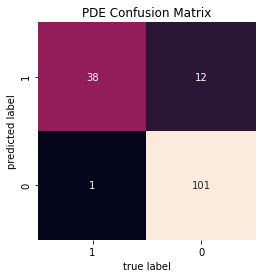

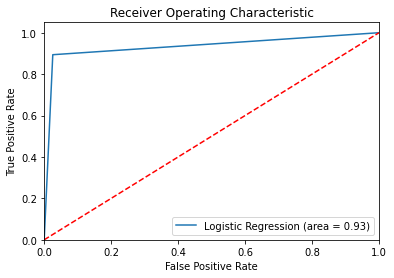

In [29]:
print(classification_report(y_test, y_pred_pde))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_pde)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('PDE Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_pde)

### PCA = 0.9 With whitening  

In [30]:
X_wsm_1 = X_sm_wpca[y_sm == 1]
X_wsm_0 = X_sm_wpca[y_sm == 0]


In [31]:
kernels = ['gaussian', 'tophat', 'exponential', 'linear', 'cosine']
bandwidths = np.logspace(-1, 1, 20)
cv_acc = {}
cv_f1 = {}
cv_auc = {}
for k in kernels:
    for bw in bandwidths:
        cv_acc[(k,bw)] = 0
        cv_f1[(k,bw)] = 0
        cv_auc[(k,bw)] = 0
        for j in range(5):
            X_wsm_0_folds = np.array_split(X_wsm_0,5)
            X_wsm_1_folds = np.array_split(X_wsm_1,5)
            X_wsm_0_test = X_wsm_0_folds[j]
            del X_wsm_0_folds[j]
            X_wsm_1_test = X_wsm_1_folds[j]
            del X_wsm_1_folds[j]
            PDE1 = KernelDensity(bandwidth = bw, kernel = k).fit(np.vstack(X_wsm_0_folds))
            PDE2 = KernelDensity(bandwidth = bw, kernel = k).fit(np.vstack(X_wsm_1_folds))
            Xtest = np.vstack([X_wsm_0_test,X_wsm_1_test])
            y = np.vstack([np.zeros((X_wsm_0_test.shape[0],1)),np.ones((X_wsm_1_test.shape[0],1))])
            class0_probs = PDE1.score_samples(Xtest)
            Class1_probs = PDE2.score_samples(Xtest)
            y_pred_pde = np.zeros((y.shape))
            for i in range(y_pred_pde.shape[0]):
                if class0_probs[i] < Class1_probs[i] :   y_pred_pde[i] = 1
            acc = np.mean(y == y_pred_pde)
            f1 = f1_score(y,y_pred_pde)
            auc = roc_auc_score(y,y_pred_pde) 
            cv_acc[(k,bw)] += (acc - cv_acc[(k,bw)])/(j+1)   
            cv_f1[(k,bw)] += (f1 - cv_f1[(k,bw)])/(j+1)   
            cv_auc[(k,bw)] += (auc - cv_auc[(k,bw)])/(j+1)            

#optimal number of components 
max_key_acc = max(cv_acc, key=cv_acc.get)
max_value_acc = max(cv_acc.values())
print("The best number of components for each class is(respectively)",max_key_acc,"and the best accuracy is",max_value_acc)

max_key_f1 = max(cv_f1, key=cv_f1.get)
max_value_f1 = max(cv_f1.values())
print("The best number of components for each class is(respectively)",max_key_f1,"and the best f1_score is",max_value_f1)

max_key_auc = max(cv_auc, key=cv_auc.get)
max_value_auc = max(cv_auc.values())
print("The best number of components for each class is(respectively)",max_key_auc,"and the best roc_auc is",max_value_auc)

The best number of components for each class is(respectively) ('exponential', 0.33598182862837817) and the best accuracy is 0.9345787545787546
The best number of components for each class is(respectively) ('exponential', 0.33598182862837817) and the best f1_score is 0.9310994283388171
The best number of components for each class is(respectively) ('exponential', 0.33598182862837817) and the best roc_auc is 0.9345787545787546


### Accuracy & ROC_AUC & F1_Score Metric 

In [32]:
pde_1 = KernelDensity(bandwidth = 0.33598182862837817, kernel = 'exponential').fit(np.vstack(X_wsm_0))
pde_2 = KernelDensity(bandwidth =0.33598182862837817, kernel = 'exponential').fit(np.vstack(X_wsm_1))
class0_probs = pde_1.score_samples(X_wpca_test)
Class1_probs = pde_2.score_samples(X_wpca_test)
y_pred_pde_1 = np.zeros((y_test.shape))
for i in range(len(X_wpca_test)):
    if class0_probs[i] < Class1_probs[i] :   
        y_pred_pde_1[i] = 1

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        39
           1       0.92      0.92      0.92       113

    accuracy                           0.88       152
   macro avg       0.84      0.84      0.84       152
weighted avg       0.88      0.88      0.88       152



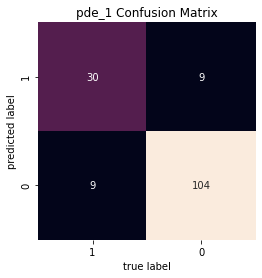

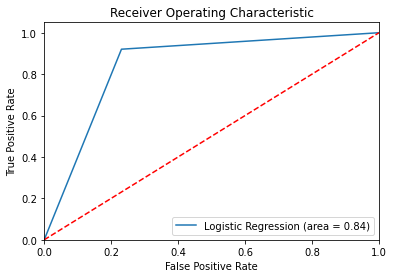

In [33]:
print(classification_report(y_test, y_pred_pde_1))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_pde_1)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('pde_1 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_pde_1)

## KNN Density Estimation for Optimal Bayes Classifier 

### PCA = 0.9 Without whitening


In [34]:
class NeighborsDensity():
    def __init__(self,n_neighbors = 1):
        self.n_neighbors = n_neighbors
        return
    def fit(self,X):
        self.X_train = X.copy()
        self.n = len(X)
        self.d = X.shape[1]
        return

    def score_samples(self,X):
        """
        Compute the log probabilities for each sample.
        """
        sample_probs = []
        for i in range (X.shape[0]) : 
            x = X[i,:]
            distances = []
            for j in range (self.X_train.shape[0]):
                y = self.X_train[j,:]
                distances.append(np.linalg.norm(x - y))

            distances.sort()
            sample_probs.append((self.n_neighbors / self.n) / (distances[self.n_neighbors -1] ** self.d))

        return sample_probs

In [35]:
X_sm_1 = X_sm_pca[y_sm == 1]
X_sm_0 = X_sm_pca[y_sm == 0]

In [36]:
neighbors= [1,2,3,4,5]
cv_acc = {}
cv_f1 = {}
cv_auc = {}
for c1 in neighbors:
    for c2 in neighbors:
        cv_acc[(c1,c2)] = 0
        cv_f1[(c1,c2)] = 0
        cv_auc[(c1,c2)] = 0
        for k in range(5):
            X_sm_0_folds = np.array_split(X_sm_0,5)
            X_sm_1_folds = np.array_split(X_sm_1,5)
            X_sm_0_test = X_sm_0_folds[k]
            del X_sm_0_folds[k]
            X_sm_1_test = X_sm_1_folds[k]
            del X_sm_1_folds[k]
            NDE1 = NeighborsDensity(n_neighbors= c1)
            NDE1.fit(np.vstack(X_sm_0_folds))
            NDE2 = NeighborsDensity(n_neighbors= c2)
            NDE2.fit(np.vstack(X_sm_1_folds))
            Xtest = np.vstack([X_sm_0_test,X_sm_1_test])
            y = np.vstack([np.zeros((X_sm_0_test.shape[0],1)),np.ones((X_sm_1_test.shape[0],1))])
            class0_probs = NDE1.score_samples(Xtest)
            Class1_probs = NDE2.score_samples(Xtest)
            y_pred_nde = np.zeros((y.shape))
            for i in range(y_pred_nde.shape[0]):
                if class0_probs[i] < Class1_probs[i] :   y_pred_nde[i] = 1
            acc = np.mean(y == y_pred_nde)
            f1 = f1_score(y,y_pred_nde)
            auc = roc_auc_score(y,y_pred_nde) 
            cv_acc[(c1,c2)] += (acc - cv_acc[(c1,c2)])/(k+1)   
            cv_f1[(c1,c2)] += (f1 - cv_f1[(c1,c2)])/(k+1)   
            cv_auc[(c1,c2)] += (auc - cv_auc[(c1,c2)])/(k+1)            

#optimal number of neighbors
max_key_acc = max(cv_acc, key=cv_acc.get)
max_value_acc = max(cv_acc.values())
print("The best number of neighborsfor each class is(respectively)",max_key_acc,"and the best accuracy is",max_value_acc)

max_key_f1 = max(cv_f1, key=cv_f1.get)
max_value_f1 = max(cv_f1.values())
print("The best number of neighborsfor each class is(respectively)",max_key_f1,"and the best f1_score is",max_value_f1)

max_key_auc = max(cv_auc, key=cv_auc.get)
max_value_auc = max(cv_auc.values())
print("The best number of neighborsfor each class is(respectively)",max_key_auc,"and the best roc_auc is",max_value_auc)

The best number of neighborsfor each class is(respectively) (1, 1) and the best accuracy is 0.9423809523809523
The best number of neighborsfor each class is(respectively) (1, 1) and the best f1_score is 0.939062981338101
The best number of neighborsfor each class is(respectively) (1, 1) and the best roc_auc is 0.9423809523809523


### Accuracy & ROC_AUC & F1_Score Metric 

In [37]:
NDE1 = NeighborsDensity(n_neighbors= 1)
NDE1.fit(np.vstack(X_sm_0))
NDE2 = NeighborsDensity(n_neighbors= 1)
NDE2.fit(np.vstack(X_sm_1))
class0_probs = NDE1.score_samples(X_pca_test)
Class1_probs = NDE2.score_samples(X_pca_test)
y_pred_nde = np.zeros((y_test.shape))
for i in range(len(X_pca_test)):
    if class0_probs[i] < Class1_probs[i] :   
        y_pred_nde[i] = 1

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        39
           1       0.95      0.93      0.94       113

    accuracy                           0.91       152
   macro avg       0.88      0.89      0.88       152
weighted avg       0.91      0.91      0.91       152



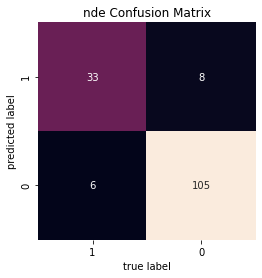

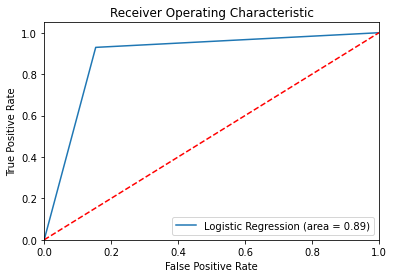

In [38]:
print(classification_report(y_test, y_pred_nde))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_nde)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('nde Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_nde)

### PCA = 0.9 With whitening  

In [39]:
X_wsm_1 = X_sm_wpca[y_sm == 1]
X_wsm_0 = X_sm_wpca[y_sm == 0]


In [40]:
neighbors= [1,2,3,4,5]
cv_acc = {}
cv_f1 = {}
cv_auc = {}
for c1 in neighbors:
    for c2 in neighbors:
        cv_acc[(c1,c2)] = 0
        cv_f1[(c1,c2)] = 0
        cv_auc[(c1,c2)] = 0
        for k in range(5):
            X_wsm_0_folds = np.array_split(X_wsm_0,5)
            X_wsm_1_folds = np.array_split(X_wsm_1,5)
            X_wsm_0_test = X_wsm_0_folds[k]
            del X_wsm_0_folds[k]
            X_wsm_1_test = X_wsm_1_folds[k]
            del X_wsm_1_folds[k]
            NDE1 = NeighborsDensity(n_neighbors= c1)
            NDE1.fit(np.vstack(X_wsm_0_folds))
            NDE2 = NeighborsDensity(n_neighbors= c2)
            NDE2.fit(np.vstack(X_wsm_1_folds))
            Xtest = np.vstack([X_wsm_0_test,X_wsm_1_test])
            y = np.vstack([np.zeros((X_wsm_0_test.shape[0],1)),np.ones((X_wsm_1_test.shape[0],1))])
            class0_probs = NDE1.score_samples(Xtest)
            Class1_probs = NDE2.score_samples(Xtest)
            y_pred_nde = np.zeros((y.shape))
            for i in range(y_pred_nde.shape[0]):
                if class0_probs[i] < Class1_probs[i] :   y_pred_nde[i] = 1
            acc = np.mean(y == y_pred_nde)
            f1 = f1_score(y,y_pred_nde)
            auc = roc_auc_score(y,y_pred_nde) 
            cv_acc[(c1,c2)] += (acc - cv_acc[(c1,c2)])/(k+1)   
            cv_f1[(c1,c2)] += (f1 - cv_f1[(c1,c2)])/(k+1)   
            cv_auc[(c1,c2)] += (auc - cv_auc[(c1,c2)])/(k+1)            

#optimal number of neighbors
max_key_acc = max(cv_acc, key=cv_acc.get)
max_value_acc = max(cv_acc.values())
print("The best number of neighborsfor each class is(respectively)",max_key_acc,"and the best accuracy is",max_value_acc)

max_key_f1 = max(cv_f1, key=cv_f1.get)
max_value_f1 = max(cv_f1.values())
print("The best number of neighborsfor each class is(respectively)",max_key_f1,"and the best f1_score is",max_value_f1)

max_key_auc = max(cv_auc, key=cv_auc.get)
max_value_auc = max(cv_auc.values())
print("The best number of neighborsfor each class is(respectively)",max_key_auc,"and the best roc_auc is",max_value_auc)

The best number of neighborsfor each class is(respectively) (2, 1) and the best accuracy is 0.9379487179487179
The best number of neighborsfor each class is(respectively) (2, 1) and the best f1_score is 0.9364322027858984
The best number of neighborsfor each class is(respectively) (2, 1) and the best roc_auc is 0.9379487179487179


### Accuracy & ROC_AUC & F1_Score Metric 

In [41]:
NDE3 = NeighborsDensity(n_neighbors= 2)
NDE3.fit(np.vstack(X_sm_0))
NDE4 = NeighborsDensity(n_neighbors= 1)
NDE4.fit(np.vstack(X_sm_1))
class0_probs = NDE3.score_samples(X_pca_test)
Class3_probs = NDE4.score_samples(X_pca_test)
y_pred_nde1 = np.zeros((y_test.shape))
for i in range(len(X_pca_test)):
    if class0_probs[i] < Class3_probs[i] :   
        y_pred_nde1[i] = 1

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        39
           1       0.92      0.96      0.94       113

    accuracy                           0.91       152
   macro avg       0.90      0.87      0.88       152
weighted avg       0.91      0.91      0.91       152



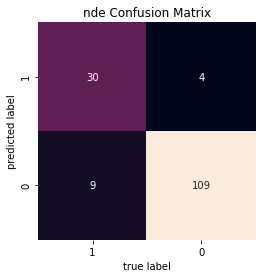

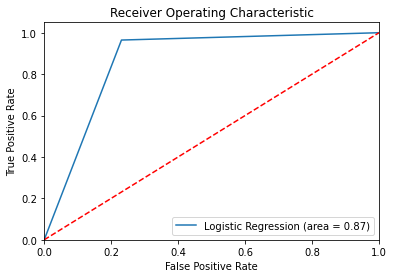

In [42]:
print(classification_report(y_test, y_pred_nde1))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_nde1)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('nde Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_nde1)

## GMM Density Estimation for Optimal Bayes Classifier 

### PCA = 0.9 Without whitening  

In [43]:
X_sm_1 = X_sm_pca[y_sm == 1]
X_sm_0 = X_sm_pca[y_sm == 0]

In [44]:
components = [1,2,3,4,5]
cv_acc = {}
cv_f1 = {}
cv_auc = {}
for c1 in components:
    for c2 in components:
        cv_acc[(c1,c2)] = 0
        cv_f1[(c1,c2)] = 0
        cv_auc[(c1,c2)] = 0
        for k in range(5):
            X_sm_0_folds = np.array_split(X_sm_0,5)
            X_sm_1_folds = np.array_split(X_sm_1,5)
            X_sm_0_test = X_sm_0_folds[k]
            del X_sm_0_folds[k]
            X_sm_1_test = X_sm_1_folds[k]
            del X_sm_1_folds[k]
            GMM1 = GaussianMixture(n_components = c1,random_state = 0).fit(np.vstack(X_sm_0_folds))
            GMM2 = GaussianMixture(n_components = c2,random_state = 0).fit(np.vstack(X_sm_1_folds))
            Xtest = np.vstack([X_sm_0_test,X_sm_1_test])
            y = np.vstack([np.zeros((X_sm_0_test.shape[0],1)),np.ones((X_sm_1_test.shape[0],1))])
            class0_probs = GMM1.score_samples(Xtest)
            Class1_probs = GMM2.score_samples(Xtest)
            y_pred_gmm = np.zeros((y.shape))
            for i in range(y_pred_gmm.shape[0]):
                if class0_probs[i] < Class1_probs[i] :   y_pred_gmm[i] = 1
            acc = np.mean(y == y_pred_gmm)
            f1 = f1_score(y,y_pred_gmm)
            auc = roc_auc_score(y,y_pred_gmm) 
            cv_acc[(c1,c2)] += (acc - cv_acc[(c1,c2)])/(k+1)   
            cv_f1[(c1,c2)] += (f1 - cv_f1[(c1,c2)])/(k+1)   
            cv_auc[(c1,c2)] += (auc - cv_auc[(c1,c2)])/(k+1)            

#optimal number of components 
max_key_acc = max(cv_acc, key=cv_acc.get)
max_value_acc = max(cv_acc.values())
print("The best number of components for each class is(respectively)",max_key_acc,"and the best accuracy is",max_value_acc)

max_key_f1 = max(cv_f1, key=cv_f1.get)
max_value_f1 = max(cv_f1.values())
print("The best number of components for each class is(respectively)",max_key_f1,"and the best f1_score is",max_value_f1)

max_key_auc = max(cv_auc, key=cv_auc.get)
max_value_auc = max(cv_auc.values())
print("The best number of components for each class is(respectively)",max_key_auc,"and the best roc_auc is",max_value_auc)

The best number of components for each class is(respectively) (2, 3) and the best accuracy is 0.95009768009768
The best number of components for each class is(respectively) (2, 3) and the best f1_score is 0.9523518101514361
The best number of components for each class is(respectively) (2, 3) and the best roc_auc is 0.95009768009768


### Accuracy & roc_auc & F1_score Metric 

In [45]:
GMM1 = GaussianMixture(n_components = 2,random_state = 0).fit(np.vstack(X_sm_0))
GMM2 = GaussianMixture(n_components = 3,random_state = 0).fit(np.vstack(X_sm_1))
class0_probs = GMM1.score_samples(X_pca_test)
Class1_probs = GMM2.score_samples(X_pca_test)
y_pred_gmm = np.zeros((y_test.shape))
for i in range(len(X_pca_test)):
    if class0_probs[i] < Class1_probs[i] :   
        y_pred_gmm[i] = 1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.74      1.00      0.85       113

    accuracy                           0.74       152
   macro avg       0.37      0.50      0.43       152
weighted avg       0.55      0.74      0.63       152



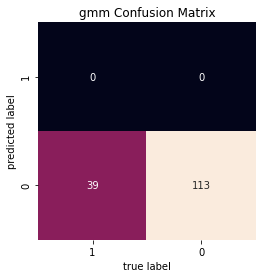

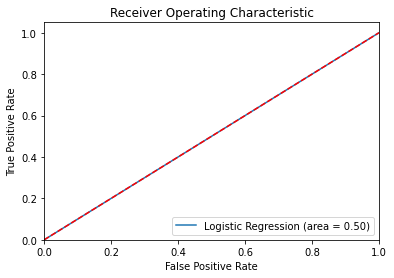

In [46]:
print(classification_report(y_test, y_pred_gmm))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_gmm)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('gmm Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_gmm)

### PCA = 0.9 With whitening  

In [47]:
X_wsm_1 = X_sm_wpca[y_sm == 1]
X_wsm_0 = X_sm_wpca[y_sm == 0]


In [48]:
components = [1,2,3,4,5]
cv_acc = {}
cv_f1 = {}
cv_auc = {}
for c1 in components:
    for c2 in components:
        cv_acc[(c1,c2)] = 0
        cv_f1[(c1,c2)] = 0
        cv_auc[(c1,c2)] = 0
        for k in range(5):
            X_wsm_0_folds = np.array_split(X_wsm_0,5)
            X_wsm_1_folds = np.array_split(X_wsm_1,5)
            X_wsm_0_test = X_wsm_0_folds[k]
            del X_wsm_0_folds[k]
            X_wsm_1_test = X_wsm_1_folds[k]
            del X_wsm_1_folds[k]
            GMM1 = GaussianMixture(n_components = c1,random_state = 0).fit(np.vstack(X_wsm_0_folds))
            GMM2 = GaussianMixture(n_components = c2,random_state = 0).fit(np.vstack(X_wsm_1_folds))
            Xtest = np.vstack([X_wsm_0_test,X_wsm_1_test])
            y = np.vstack([np.zeros((X_wsm_0_test.shape[0],1)),np.ones((X_wsm_1_test.shape[0],1))])
            class0_probs = GMM1.score_samples(Xtest)
            Class1_probs = GMM2.score_samples(Xtest)
            y_pred_gmm = np.zeros((y.shape))
            for i in range(y_pred_gmm.shape[0]):
                if class0_probs[i] < Class1_probs[i] :   y_pred_gmm[i] = 1
            acc = np.mean(y == y_pred_gmm)
            f1 = f1_score(y,y_pred_gmm)
            auc = roc_auc_score(y,y_pred_gmm) 
            cv_acc[(c1,c2)] += (acc - cv_acc[(c1,c2)])/(k+1)   
            cv_f1[(c1,c2)] += (f1 - cv_f1[(c1,c2)])/(k+1)   
            cv_auc[(c1,c2)] += (auc - cv_auc[(c1,c2)])/(k+1)            

#optimal number of components 
max_key_acc = max(cv_acc, key=cv_acc.get)
max_value_acc = max(cv_acc.values())
print("The best number of components for each class is(respectively)",max_key_acc,"and the best accuracy is",max_value_acc)

max_key_f1 = max(cv_f1, key=cv_f1.get)
max_value_f1 = max(cv_f1.values())
print("The best number of components for each class is(respectively)",max_key_f1,"and the best f1_score is",max_value_f1)

max_key_auc = max(cv_auc, key=cv_auc.get)
max_value_auc = max(cv_auc.values())
print("The best number of components for each class is(respectively)",max_key_auc,"and the best roc_auc is",max_value_auc)

The best number of components for each class is(respectively) (1, 3) and the best accuracy is 0.9612210012210012
The best number of components for each class is(respectively) (1, 3) and the best f1_score is 0.9624789355571862
The best number of components for each class is(respectively) (1, 3) and the best roc_auc is 0.9612210012210013


### Accuracy and ROC_AUC and F1_Score Metric 

In [49]:
GMM3 = GaussianMixture(n_components = 1,random_state = 0).fit(np.vstack(X_wsm_0))
GMM4 = GaussianMixture(n_components = 3,random_state = 0).fit(np.vstack(X_wsm_1))
class0_probs = GMM3.score_samples(X_wpca_test)
Class1_probs = GMM4.score_samples(X_wpca_test)
y_pred_gmm1 = np.zeros((y_test.shape))
for i in range(len(X_wpca_test)):
                if class0_probs[i] < Class1_probs[i] :   
                    y_pred_gmm1[i] = 1

              precision    recall  f1-score   support

           0       0.91      0.51      0.66        39
           1       0.85      0.98      0.91       113

    accuracy                           0.86       152
   macro avg       0.88      0.75      0.78       152
weighted avg       0.87      0.86      0.85       152



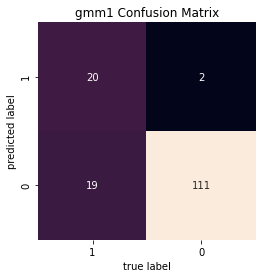

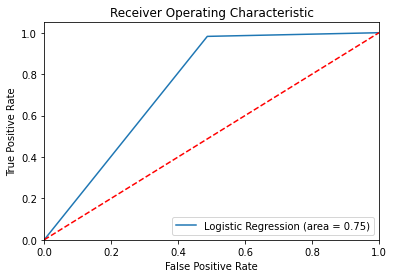

In [50]:
print(classification_report(y_test, y_pred_gmm1))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_gmm1)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('gmm1 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_gmm1)

# Discriminative Classifiers 

## Logistic Regression 

### Accuaracy Metric

In [51]:
# use pipeline
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('Log_Reg', LogisticRegression())]
Log_Reg_pipeline = Pipeline(steps) # define the pipeline object.
parameteres = {'pca__n_components':[0.95,0.99,0.995],'pca__whiten':[False,True],
               'Log_Reg__penalty':['l1','l2'], 'Log_Reg__solver':['lbfgs', 'liblinear'],
               'Log_Reg__C':[0.5,0.75,1,1.5]}
grid_log = GridSearchCV(Log_Reg_pipeline, param_grid=parameteres,scoring ='accuracy',verbose= 3, cv=5)
grid_log.fit(X_sm, y_sm)

se; total time=   0.4s
[CV 5/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=False; total time=   0.3s
[CV 1/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.3s
[CV 2/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.4s
[CV 3/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.3s
[CV 4/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.3s
[CV 5/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.3s
[CV 1/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.99, pca__whiten=False; total time=   0.4s
[CV 2/5] END Log_Reg__C

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('Log_Reg', LogisticRegression())]),
             param_grid={'Log_Reg__C': [0.5, 0.75, 1, 1.5],
                         'Log_Reg__penalty': ['l1', 'l2'],
                         'Log_Reg__solver': ['lbfgs', 'liblinear'],
                         'pca__n_components': [0.95, 0.99, 0.995],
                         'pca__whiten': [False, True]},
             scoring='accuracy', verbose=3)

In [52]:
print ('best parameters of the model are:',grid_log.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_log.best_score_)

best parameters of the model are: {'Log_Reg__C': 1, 'Log_Reg__penalty': 'l2', 'Log_Reg__solver': 'lbfgs', 'pca__n_components': 0.995, 'pca__whiten': False}
Mean accuracy of the model with 5-fold is: 0.9168999386126458


              precision    recall  f1-score   support

           0       0.69      0.74      0.72        39
           1       0.91      0.88      0.90       113

    accuracy                           0.85       152
   macro avg       0.80      0.81      0.81       152
weighted avg       0.85      0.85      0.85       152



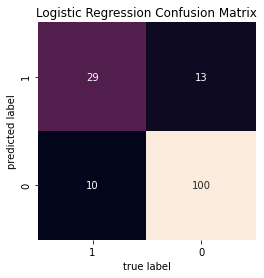

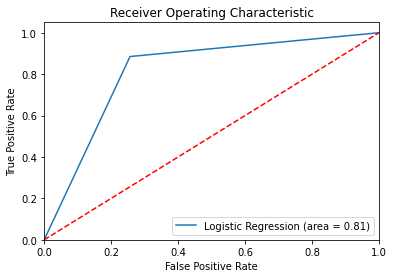

In [53]:
y_pred_log = grid_log.predict(X_test)

print(classification_report(y_test, y_pred_log))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_log)

### Logistic Regression without resampling (Balanced_Accuracy Metric) 

In [54]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('Log_Reg', LogisticRegression(class_weight = 'balanced'))]
Log_Reg_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.9,0.95,0.99],'pca__whiten':[False,True],
               'Log_Reg__penalty':['l1','l2'], 'Log_Reg__solver':['lbfgs', 'liblinear'],
               'Log_Reg__C':[0.25,0.5,1,5]}
grid_log2 = GridSearchCV(Log_Reg_pipeline, param_grid=parameteres,scoring ='balanced_accuracy',verbose= 3, cv=5)
grid_log2.fit(X_train, y_train)

og_Reg__solver=liblinear, pca__n_components=0.9, pca__whiten=False; total time=   0.1s
[CV 3/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.9, pca__whiten=False; total time=   0.1s
[CV 4/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.9, pca__whiten=False; total time=   0.1s
[CV 5/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.9, pca__whiten=False; total time=   0.2s
[CV 1/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.9, pca__whiten=True; total time=   0.1s
[CV 2/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.9, pca__whiten=True; total time=   0.1s
[CV 3/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.9, pca__whiten=True; total time=   0.1s
[CV 4/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.9, pc

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('Log_Reg',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'Log_Reg__C': [0.25, 0.5, 1, 5],
                         'Log_Reg__penalty': ['l1', 'l2'],
                         'Log_Reg__solver': ['lbfgs', 'liblinear'],
                         'pca__n_components': [0.9, 0.95, 0.99],
                         'pca__whiten': [False, True]},
             scoring='balanced_accuracy', verbose=3)

In [55]:
print ('best parameters of the model are:',grid_log2.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_log2.best_score_)

best parameters of the model are: {'Log_Reg__C': 0.25, 'Log_Reg__penalty': 'l2', 'Log_Reg__solver': 'liblinear', 'pca__n_components': 0.9, 'pca__whiten': False}
Mean accuracy of the model with 5-fold is: 0.7884977746268069


              precision    recall  f1-score   support

           0       0.30      0.49      0.37        39
           1       0.78      0.61      0.68       113

    accuracy                           0.58       152
   macro avg       0.54      0.55      0.53       152
weighted avg       0.65      0.58      0.60       152



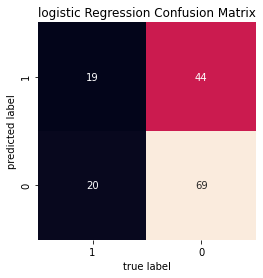

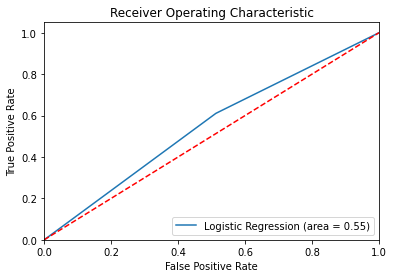

In [56]:
y_pred_log2 = grid_log2.predict(X_test)

print(classification_report(y_test, y_pred_log2))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_log2)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('logistic Regression Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_log2)

### F1 Score Metric

In [57]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('Log_Reg', LogisticRegression(class_weight = 'balanced'))]
Log_Reg_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.95,0.99,0.995],'pca__whiten':[False,True],
               'Log_Reg__penalty':['l1','l2'], 'Log_Reg__solver':['lbfgs', 'liblinear'],
               'Log_Reg__C':[0.25,0.5,1,5]}
grid_log3 = GridSearchCV(Log_Reg_pipeline, param_grid=parameteres,scoring ='f1',verbose= 3, cv=5)
grid_log3.fit(X_sm, y_sm)

D Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=False; total time=   0.3s
[CV 4/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=False; total time=   0.2s
[CV 5/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=False; total time=   0.4s
[CV 1/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.3s
[CV 2/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.2s
[CV 3/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.2s
[CV 4/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.2s
[CV 5/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('Log_Reg',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'Log_Reg__C': [0.25, 0.5, 1, 5],
                         'Log_Reg__penalty': ['l1', 'l2'],
                         'Log_Reg__solver': ['lbfgs', 'liblinear'],
                         'pca__n_components': [0.95, 0.99, 0.995],
                         'pca__whiten': [False, True]},
             scoring='f1', verbose=3)

In [58]:
print ('best parameters of the model are:',grid_log3.best_params_)
print ('Mean f1 score of the model with 5-fold is:',grid_log3.best_score_)

best parameters of the model are: {'Log_Reg__C': 1, 'Log_Reg__penalty': 'l2', 'Log_Reg__solver': 'lbfgs', 'pca__n_components': 0.995, 'pca__whiten': False}
Mean f1 score of the model with 5-fold is: 0.9125845493821567


              precision    recall  f1-score   support

           0       0.69      0.74      0.72        39
           1       0.91      0.88      0.90       113

    accuracy                           0.85       152
   macro avg       0.80      0.81      0.81       152
weighted avg       0.85      0.85      0.85       152



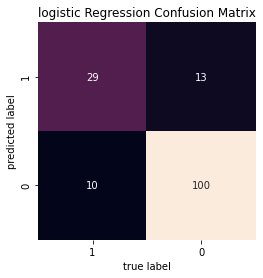

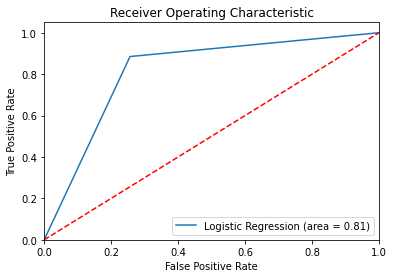

In [59]:
y_pred_log3 = grid_log3.predict(X_test)

print(classification_report(y_test, y_pred_log3))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_log3)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('logistic Regression Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_log3)

### ROC_AUC Metric 

In [60]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('Log_Reg', LogisticRegression(class_weight = 'balanced'))]
Log_Reg_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.95,0.99,0.995],'pca__whiten':[False,True],
               'Log_Reg__penalty':['l1','l2'], 'Log_Reg__solver':['lbfgs', 'liblinear'],
               'Log_Reg__C':[0.25,0.5,1,5]}
grid_log4 = GridSearchCV(Log_Reg_pipeline, param_grid=parameteres,scoring ='roc_auc',verbose= 3, cv=5)
grid_log4.fit(X_sm, y_sm)

D Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=False; total time=   0.3s
[CV 4/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=False; total time=   0.2s
[CV 5/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=False; total time=   0.2s
[CV 1/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.2s
[CV 2/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.2s
[CV 3/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.3s
[CV 4/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg__solver=liblinear, pca__n_components=0.95, pca__whiten=True; total time=   0.2s
[CV 5/5] END Log_Reg__C=1, Log_Reg__penalty=l2, Log_Reg_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('Log_Reg',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'Log_Reg__C': [0.25, 0.5, 1, 5],
                         'Log_Reg__penalty': ['l1', 'l2'],
                         'Log_Reg__solver': ['lbfgs', 'liblinear'],
                         'pca__n_components': [0.95, 0.99, 0.995],
                         'pca__whiten': [False, True]},
             scoring='roc_auc', verbose=3)

In [61]:
print ('best parameters of the model are:',grid_log4.best_params_)
print ('Mean roc_auc score of the model with 5-fold is:',grid_log4.best_score_)

best parameters of the model are: {'Log_Reg__C': 0.25, 'Log_Reg__penalty': 'l2', 'Log_Reg__solver': 'lbfgs', 'pca__n_components': 0.995, 'pca__whiten': False}
Mean roc_auc score of the model with 5-fold is: 0.9611599511599511


              precision    recall  f1-score   support

           0       0.71      0.77      0.74        39
           1       0.92      0.89      0.91       113

    accuracy                           0.86       152
   macro avg       0.82      0.83      0.82       152
weighted avg       0.87      0.86      0.86       152



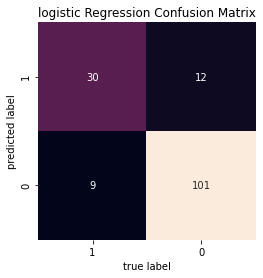

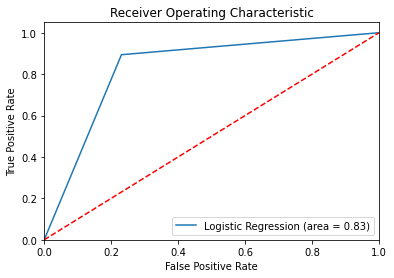

In [62]:
y_pred_log4 = grid_log4.predict(X_test)

print(classification_report(y_test, y_pred_log4))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_log4)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('logistic Regression Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_log4)

## SVM

### Accuracy Metric 

In [63]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('svm', SVC())]
svm_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.99,0.995,0.999],'pca__whiten':[False,True],
               'svm__kernel':['liner','poly','rbf', 'sigmoid'],'svm__C':[5,10,12,15]}
grid_svm = GridSearchCV(svm_pipeline, param_grid=parameteres,scoring ='accuracy',verbose= 3, cv=5,return_train_score = True)
grid_svm.fit(X_sm, y_sm)

=True, svm__C=12, svm__kernel=poly; total time=   0.4s
[CV 1/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=rbf; total time=   0.5s
[CV 2/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=rbf; total time=   0.4s
[CV 3/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=rbf; total time=   0.5s
[CV 4/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=rbf; total time=   0.7s
[CV 5/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=rbf; total time=   0.5s
[CV 1/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=sigmoid; total time=   0.4s
[CV 2/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=sigmoid; total time=   0.3s
[CV 3/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=sigmoid; total time=   0.4s
[CV 4/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=sigmoid; total time=   0.3s
[C

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svm', SVC())]),
             param_grid={'pca__n_components': [0.99, 0.995, 0.999],
                         'pca__whiten': [False, True],
                         'svm__C': [5, 10, 12, 15],
                         'svm__kernel': ['liner', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [64]:
print ('best parameters of the model are:',grid_svm.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_svm.best_score_)

best parameters of the model are: {'pca__n_components': 0.999, 'pca__whiten': False, 'svm__C': 10, 'svm__kernel': 'rbf'}
Mean accuracy of the model with 5-fold is: 0.9634561080417434


              precision    recall  f1-score   support

           0       0.82      0.69      0.75        39
           1       0.90      0.95      0.92       113

    accuracy                           0.88       152
   macro avg       0.86      0.82      0.84       152
weighted avg       0.88      0.88      0.88       152



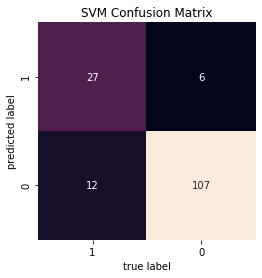

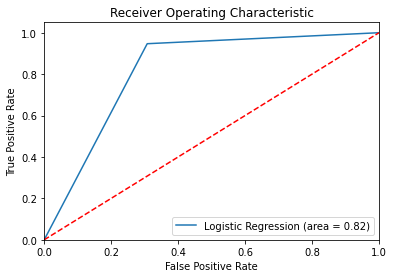

In [65]:
y_pred_svm = grid_svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('SVM Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_svm)

### Using LDA

In [66]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('lda',LDA()), ('svm', SVC())]
svm_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.99,0.995,0.999],'pca__whiten':[False,True],
               'svm__kernel':['liner','poly','rbf', 'sigmoid'],'svm__C':[5,10,12,15]}
grid_svm4 = GridSearchCV(svm_pipeline, param_grid=parameteres,scoring ='accuracy',verbose= 3, cv=5,return_train_score = True)
grid_svm4.fit(X_sm, y_sm)

=True, svm__C=12, svm__kernel=poly; total time=   0.5s
[CV 1/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=rbf; total time=   0.4s
[CV 2/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=rbf; total time=   0.3s
[CV 3/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=rbf; total time=   0.3s
[CV 4/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=rbf; total time=   0.3s
[CV 5/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=rbf; total time=   0.4s
[CV 1/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=sigmoid; total time=   0.3s
[CV 2/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=sigmoid; total time=   0.5s
[CV 3/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=sigmoid; total time=   0.5s
[CV 4/5] END pca__n_components=0.995, pca__whiten=True, svm__C=12, svm__kernel=sigmoid; total time=   0.3s
[C

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lda', LinearDiscriminantAnalysis()),
                                       ('svm', SVC())]),
             param_grid={'pca__n_components': [0.99, 0.995, 0.999],
                         'pca__whiten': [False, True],
                         'svm__C': [5, 10, 12, 15],
                         'svm__kernel': ['liner', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [67]:
print ('best parameters of the model are:',grid_svm4.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_svm4.best_score_)

best parameters of the model are: {'pca__n_components': 0.999, 'pca__whiten': False, 'svm__C': 5, 'svm__kernel': 'poly'}
Mean accuracy of the model with 5-fold is: 0.9280049109883365


              precision    recall  f1-score   support

           0       0.67      0.46      0.55        39
           1       0.83      0.92      0.87       113

    accuracy                           0.80       152
   macro avg       0.75      0.69      0.71       152
weighted avg       0.79      0.80      0.79       152



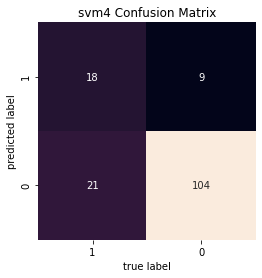

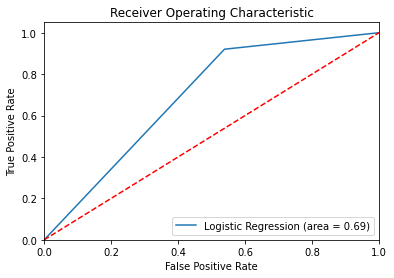

In [68]:
y_pred_svm4 = grid_svm4.predict(X_test)
print(classification_report(y_test, y_pred_svm4))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_svm4)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('svm4 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_svm4)

### F1-Score Metric 

In [69]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('svm', SVC())]
svm_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.99,0.995,0.999],'pca__whiten':[False,True],
               'svm__kernel':['liner','poly','rbf', 'sigmoid'],'svm__C':[1,5,7,10]}
grid_svm2 = GridSearchCV(svm_pipeline, param_grid=parameteres,scoring ='f1',verbose= 3, cv=5,return_train_score = True)
grid_svm2.fit(X_sm, y_sm)

C=7, svm__kernel=poly; total time=   0.5s
[CV 5/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=poly; total time=   0.5s
[CV 1/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=rbf; total time=   0.5s
[CV 2/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=rbf; total time=   0.3s
[CV 3/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=rbf; total time=   0.4s
[CV 4/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=rbf; total time=   0.3s
[CV 5/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=rbf; total time=   0.4s
[CV 1/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=sigmoid; total time=   0.3s
[CV 2/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=sigmoid; total time=   0.6s
[CV 3/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=sigmoid; total time=   0.5s
[CV 4/5] END pca__n_compone

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svm', SVC())]),
             param_grid={'pca__n_components': [0.99, 0.995, 0.999],
                         'pca__whiten': [False, True], 'svm__C': [1, 5, 7, 10],
                         'svm__kernel': ['liner', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='f1', verbose=3)

In [70]:
print ('best parameters of the model are:',grid_svm2.best_params_)
print ('Mean f1-score of the model with 5-fold is:',grid_svm2.best_score_)

best parameters of the model are: {'pca__n_components': 0.999, 'pca__whiten': False, 'svm__C': 7, 'svm__kernel': 'rbf'}
Mean f1-score of the model with 5-fold is: 0.9636342580549224


              precision    recall  f1-score   support

           0       0.82      0.69      0.75        39
           1       0.90      0.95      0.92       113

    accuracy                           0.88       152
   macro avg       0.86      0.82      0.84       152
weighted avg       0.88      0.88      0.88       152



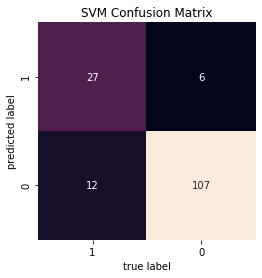

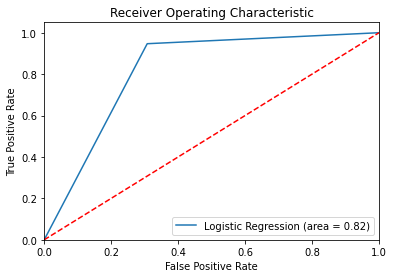

In [71]:
y_pred_svm2 = grid_svm2.predict(X_test)

print(classification_report(y_test, y_pred_svm2))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_svm2)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('SVM Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_svm2)

### ROC_AUC Metric 

In [72]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('svm', SVC())]
svm_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.99,0.995,0.999],'pca__whiten':[False,True],
               'svm__kernel':['liner','poly','rbf', 'sigmoid'],'svm__C':[1,5,7,10]}
grid_svm3 = GridSearchCV(svm_pipeline, param_grid=parameteres,scoring ='roc_auc',verbose= 3, cv=5,return_train_score = True)
grid_svm3.fit(X_sm, y_sm)

C=7, svm__kernel=poly; total time=   0.4s
[CV 5/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=poly; total time=   0.3s
[CV 1/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=rbf; total time=   0.3s
[CV 2/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=rbf; total time=   0.4s
[CV 3/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=rbf; total time=   0.4s
[CV 4/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=rbf; total time=   0.3s
[CV 5/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=rbf; total time=   0.3s
[CV 1/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=sigmoid; total time=   0.3s
[CV 2/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=sigmoid; total time=   0.3s
[CV 3/5] END pca__n_components=0.995, pca__whiten=True, svm__C=7, svm__kernel=sigmoid; total time=   0.2s
[CV 4/5] END pca__n_compone

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svm', SVC())]),
             param_grid={'pca__n_components': [0.99, 0.995, 0.999],
                         'pca__whiten': [False, True], 'svm__C': [1, 5, 7, 10],
                         'svm__kernel': ['liner', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [73]:
print ('best parameters of the model are:',grid_svm3.best_params_)
print ('Mean roc_auc of the model with 5-fold is:',grid_svm3.best_score_)

best parameters of the model are: {'pca__n_components': 0.995, 'pca__whiten': False, 'svm__C': 7, 'svm__kernel': 'rbf'}
Mean roc_auc of the model with 5-fold is: 0.9939560439560442


              precision    recall  f1-score   support

           0       0.82      0.72      0.77        39
           1       0.91      0.95      0.93       113

    accuracy                           0.89       152
   macro avg       0.87      0.83      0.85       152
weighted avg       0.89      0.89      0.89       152



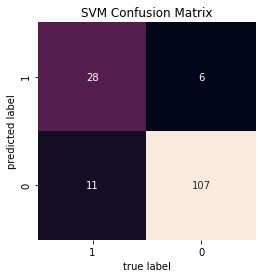

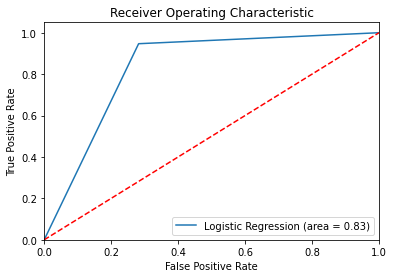

In [74]:
y_pred_svm3 = grid_svm3.predict(X_test)

print(classification_report(y_test, y_pred_svm3))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_svm3)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('SVM Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_svm3)

## Decision Tree 

### Accuracy Metric 

In [75]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('dt', DecisionTreeClassifier(random_state = 2045))]
dt_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.75,0.8,0.85],'pca__whiten':[False,True],
               'dt__max_depth':[1,5,10,12,15], 'dt__min_samples_split':[2,3,4]}
grid_dt = GridSearchCV(dt_pipeline, param_grid=parameteres,scoring ='accuracy',verbose= 3, cv=5,return_train_score = True)
grid_dt.fit(X_sm, y_sm)

t__min_samples_split=2, pca__n_components=0.75, pca__whiten=True; total time=   0.3s
[CV 1/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.4s
[CV 2/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.5s
[CV 3/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.5s
[CV 4/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.7s
[CV 5/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.4s
[CV 1/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=True; total time=   0.4s
[CV 2/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=True; total time=   0.4s
[CV 3/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=True; t

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=2045))]),
             param_grid={'dt__max_depth': [1, 5, 10, 12, 15],
                         'dt__min_samples_split': [2, 3, 4],
                         'pca__n_components': [0.75, 0.8, 0.85],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [76]:
print ('best parameters of the model are:',grid_dt.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_dt.best_score_)

best parameters of the model are: {'dt__max_depth': 12, 'dt__min_samples_split': 2, 'pca__n_components': 0.8, 'pca__whiten': False}
Mean accuracy of the model with 5-fold is: 0.8448127685696747


              precision    recall  f1-score   support

           0       0.56      0.72      0.63        39
           1       0.89      0.81      0.85       113

    accuracy                           0.78       152
   macro avg       0.73      0.76      0.74       152
weighted avg       0.81      0.78      0.79       152



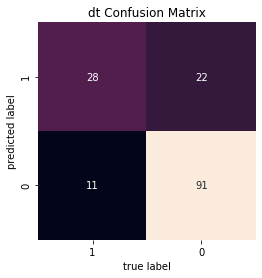

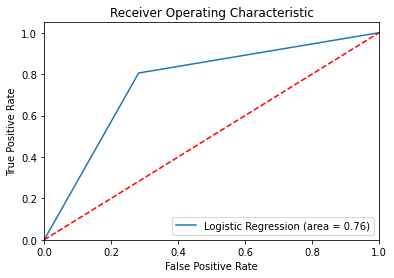

In [77]:
y_pred_dt = grid_dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('dt Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_dt)

### F1-Score Metric 

In [78]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('dt', DecisionTreeClassifier(random_state = 2045))]
dt_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.75,0.8,0.85],'pca__whiten':[False,True],
               'dt__max_depth':[1,5,10,12,15], 'dt__min_samples_split':[2,3,4]}
grid_dt1 = GridSearchCV(dt_pipeline, param_grid=parameteres,scoring ='f1',verbose= 3, cv=5,return_train_score = True)
grid_dt1.fit(X_sm, y_sm)

t__min_samples_split=2, pca__n_components=0.75, pca__whiten=True; total time=   0.1s
[CV 1/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 2/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 3/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.1s
[CV 4/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.1s
[CV 5/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.2s
[CV 1/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=True; total time=   0.2s
[CV 2/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=True; total time=   0.2s
[CV 3/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=True; t

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=2045))]),
             param_grid={'dt__max_depth': [1, 5, 10, 12, 15],
                         'dt__min_samples_split': [2, 3, 4],
                         'pca__n_components': [0.75, 0.8, 0.85],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='f1', verbose=3)

In [79]:
print ('best parameters of the model are:',grid_dt1.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_dt1.best_score_)

best parameters of the model are: {'dt__max_depth': 10, 'dt__min_samples_split': 4, 'pca__n_components': 0.75, 'pca__whiten': False}
Mean accuracy of the model with 5-fold is: 0.8374294132819194


              precision    recall  f1-score   support

           0       0.61      0.85      0.71        39
           1       0.94      0.81      0.87       113

    accuracy                           0.82       152
   macro avg       0.77      0.83      0.79       152
weighted avg       0.85      0.82      0.83       152



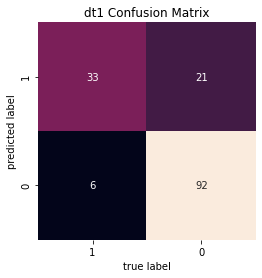

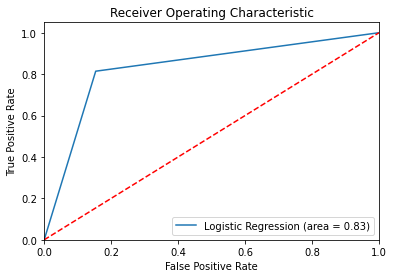

In [80]:
y_pred_dt1 = grid_dt1.predict(X_test)

print(classification_report(y_test, y_pred_dt1))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_dt1)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('dt1 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_dt1)

### ROC_AUC Metric

In [81]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('dt', DecisionTreeClassifier(random_state = 2045))]
dt_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.75,0.8,0.85],'pca__whiten':[False,True],
               'dt__max_depth':[1,5,10,12,15], 'dt__min_samples_split':[2,3,4]}
grid_dt2 = GridSearchCV(dt_pipeline, param_grid=parameteres,scoring ='roc_auc',verbose= 3, cv=5,return_train_score = True)
grid_dt2.fit(X_sm, y_sm)

t__min_samples_split=2, pca__n_components=0.75, pca__whiten=True; total time=   0.3s
[CV 1/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 2/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 3/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.4s
[CV 4/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 5/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 1/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=True; total time=   0.3s
[CV 2/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=True; total time=   0.2s
[CV 3/5] END dt__max_depth=12, dt__min_samples_split=2, pca__n_components=0.8, pca__whiten=True; t

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=2045))]),
             param_grid={'dt__max_depth': [1, 5, 10, 12, 15],
                         'dt__min_samples_split': [2, 3, 4],
                         'pca__n_components': [0.75, 0.8, 0.85],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [82]:
print ('best parameters of the model are:',grid_dt2.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_dt2.best_score_)

best parameters of the model are: {'dt__max_depth': 5, 'dt__min_samples_split': 2, 'pca__n_components': 0.75, 'pca__whiten': False}
Mean accuracy of the model with 5-fold is: 0.8600652557319226


              precision    recall  f1-score   support

           0       0.53      0.72      0.61        39
           1       0.89      0.78      0.83       113

    accuracy                           0.76       152
   macro avg       0.71      0.75      0.72       152
weighted avg       0.80      0.76      0.77       152



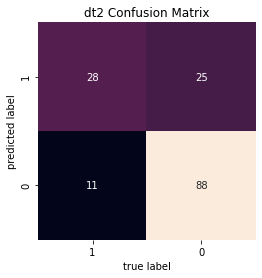

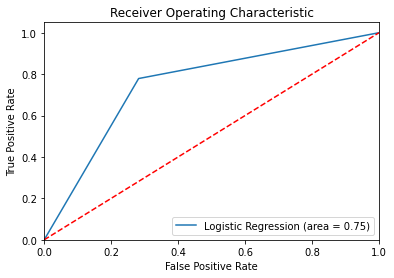

In [83]:
y_pred_dt2 = grid_dt2.predict(X_test)

print(classification_report(y_test, y_pred_dt2))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_dt2)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('dt2 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_dt2)

## KNN

### Accuracy Metric 

In [84]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('knn', KNeighborsClassifier())]
knn_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.8,0.85,0.9],'pca__whiten':[False,True],
               'knn__n_neighbors':[1,3,5]}
grid_knn = GridSearchCV(knn_pipeline, param_grid=parameteres,scoring ='accuracy',verbose= 3, cv=5,return_train_score = True)
grid_knn.fit(X_sm, y_sm)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.4s
[CV 2/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.4s
[CV 3/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.6s
[CV 4/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.5s
[CV 5/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.2s
[CV 1/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.4s
[CV 2/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.7s
[CV 3/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.4s
[CV 4/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.8s
[CV 5/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.4s
[CV 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5],
                         'pca__n_components': [0.8, 0.85, 0.9],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [85]:
print ('best parameters of the model are:',grid_knn.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_knn.best_score_)

best parameters of the model are: {'knn__n_neighbors': 1, 'pca__n_components': 0.85, 'pca__whiten': True}
Mean accuracy of the model with 5-fold is: 0.9390546347452424


              precision    recall  f1-score   support

           0       0.73      0.82      0.77        39
           1       0.94      0.89      0.91       113

    accuracy                           0.88       152
   macro avg       0.83      0.86      0.84       152
weighted avg       0.88      0.88      0.88       152



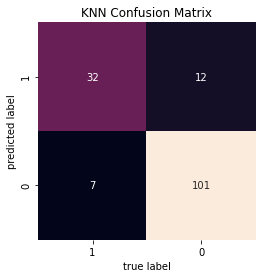

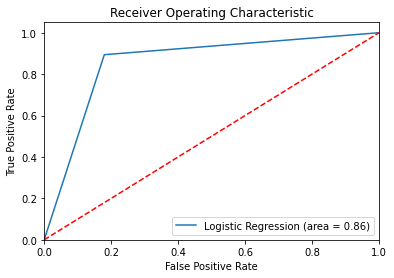

In [86]:
y_pred_knn = grid_knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('KNN Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_knn)

### f1-Score Metric 

In [87]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('knn', KNeighborsClassifier())]
knn_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.8,0.85,0.9],'pca__whiten':[False,True],
               'knn__n_neighbors':[1,3,5]}
grid_knn2 = GridSearchCV(knn_pipeline, param_grid=parameteres,scoring ='accuracy',verbose= 3, cv=5,return_train_score = True)
grid_knn2.fit(X_sm, y_sm)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.5s
[CV 2/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.2s
[CV 3/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 4/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 5/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 1/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.4s
[CV 2/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.4s
[CV 3/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.4s
[CV 4/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.3s
[CV 5/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.3s
[CV 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5],
                         'pca__n_components': [0.8, 0.85, 0.9],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [88]:
print ('best parameters of the model are:',grid_knn2.best_params_)
print ('Mean f1-score of the model with 5-fold is:',grid_knn2.best_score_)

best parameters of the model are: {'knn__n_neighbors': 1, 'pca__n_components': 0.85, 'pca__whiten': True}
Mean f1-score of the model with 5-fold is: 0.9390546347452424


              precision    recall  f1-score   support

           0       0.73      0.82      0.77        39
           1       0.94      0.89      0.91       113

    accuracy                           0.88       152
   macro avg       0.83      0.86      0.84       152
weighted avg       0.88      0.88      0.88       152



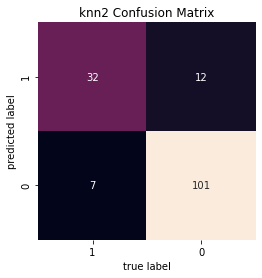

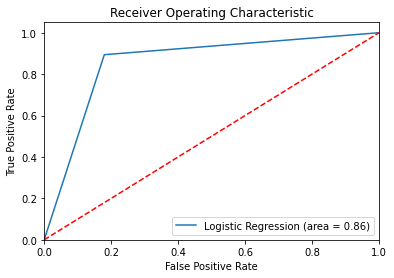

In [89]:
y_pred_knn2 = grid_knn2.predict(X_test)

print(classification_report(y_test, y_pred_knn2))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_knn2)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('knn2 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_knn2)

### ROC_AUC Metric 

In [90]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('knn', KNeighborsClassifier())]
knn_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.8,0.85,0.9],'pca__whiten':[False,True],
               'knn__n_neighbors':[1,3,5,]}
grid_knn3 = GridSearchCV(knn_pipeline, param_grid=parameteres,scoring ='accuracy',verbose= 3, cv=5,return_train_score = True)
grid_knn3.fit(X_sm, y_sm)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 2/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.9s
[CV 3/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 4/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.4s
[CV 5/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=False; total time=   0.3s
[CV 1/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.3s
[CV 2/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.4s
[CV 3/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.3s
[CV 4/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.2s
[CV 5/5] END knn__n_neighbors=1, pca__n_components=0.8, pca__whiten=True; total time=   0.5s
[CV 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5],
                         'pca__n_components': [0.8, 0.85, 0.9],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [91]:
print ('best parameters of the model are:',grid_knn3.best_params_)
print ('Mean roc_auc of the model with 5-fold is:',grid_knn3.best_score_)

best parameters of the model are: {'knn__n_neighbors': 1, 'pca__n_components': 0.85, 'pca__whiten': True}
Mean roc_auc of the model with 5-fold is: 0.9390546347452424


              precision    recall  f1-score   support

           0       0.73      0.82      0.77        39
           1       0.94      0.89      0.91       113

    accuracy                           0.88       152
   macro avg       0.83      0.86      0.84       152
weighted avg       0.88      0.88      0.88       152



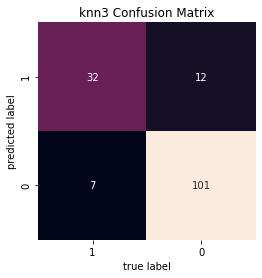

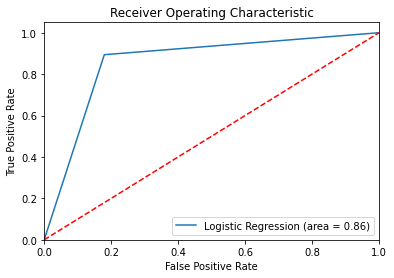

In [92]:
y_pred_knn3 = grid_knn3.predict(X_test)

print(classification_report(y_test, y_pred_knn3))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_knn3)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('knn3 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_knn3)

## MLP 

### Accuracy Metric 

In [150]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('mlp', MLPClassifier())]
mlp_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.9,0.95],'pca__whiten':[False,True],'mlp__hidden_layer_sizes':[100,200],
               'mlp__solver':['adam','sgd'],'mlp__alpha':[0.0001,0.001],'mlp__batch_size':[128,256],
               'mlp__learning_rate':['constant','invscaling'],'mlp__learning_rate_init':[0.001,0.005],'mlp__max_iter':[100,200],                     'mlp__momentum':[0.9,0.95]}
grid_mlp = GridSearchCV(mlp_pipeline, param_grid=parameteres,scoring ='accuracy',verbose= 3, cv=5,return_train_score = True)
grid_mlp.fit(X_sm, y_sm)

pha=0.001, mlp__batch_size=256, mlp__hidden_layer_sizes=200, mlp__learning_rate=invscaling, mlp__learning_rate_init=0.005, mlp__max_iter=200, mlp__momentum=0.9, mlp__solver=adam, pca__n_components=0.9, pca__whiten=False; total time=   0.7s
[CV 5/5] END mlp__alpha=0.001, mlp__batch_size=256, mlp__hidden_layer_sizes=200, mlp__learning_rate=invscaling, mlp__learning_rate_init=0.005, mlp__max_iter=200, mlp__momentum=0.9, mlp__solver=adam, pca__n_components=0.9, pca__whiten=False; total time=   0.9s
[CV 1/5] END mlp__alpha=0.001, mlp__batch_size=256, mlp__hidden_layer_sizes=200, mlp__learning_rate=invscaling, mlp__learning_rate_init=0.005, mlp__max_iter=200, mlp__momentum=0.9, mlp__solver=adam, pca__n_components=0.9, pca__whiten=True; total time=   0.6s
[CV 2/5] END mlp__alpha=0.001, mlp__batch_size=256, mlp__hidden_layer_sizes=200, mlp__learning_rate=invscaling, mlp__learning_rate_init=0.005, mlp__max_iter=200, mlp__momentum=0.9, mlp__solver=adam, pca__n_components=0.9, pca__whiten=True; t

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('mlp', MLPClassifier())]),
             param_grid={'mlp__alpha': [0.0001, 0.001],
                         'mlp__batch_size': [128, 256],
                         'mlp__hidden_layer_sizes': [100, 200],
                         'mlp__learning_rate': ['constant', 'invscaling'],
                         'mlp__learning_rate_init': [0.001, 0.005],
                         'mlp__max_iter': [100, 200],
                         'mlp__momentum': [0.9, 0.95],
                         'mlp__solver': ['adam', 'sgd'],
                         'pca__n_components': [0.9, 0.95],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [155]:
print ('best parameters of the model are:',grid_mlp.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_mlp.best_score_)

best parameters of the model are: {'mlp__alpha': 0.0001, 'mlp__batch_size': 256, 'mlp__hidden_layer_sizes': 200, 'mlp__learning_rate': 'invscaling', 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 100, 'mlp__momentum': 0.9, 'mlp__solver': 'adam', 'pca__n_components': 0.9, 'pca__whiten': False}
Mean accuracy of the model with 5-fold is: 0.9556783302639656


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        39
           1       0.93      0.93      0.93       113

    accuracy                           0.89       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.89      0.89      0.89       152



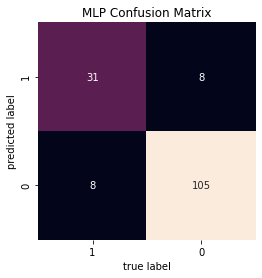

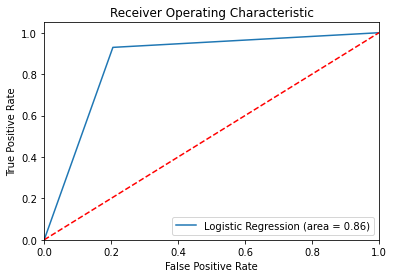

In [156]:
y_pred_mlp = grid_mlp.predict(X_test)

print(classification_report(y_test, y_pred_mlp))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('MLP Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_mlp)

### F1-Score Metric 

In [162]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('mlp', MLPClassifier())]
mlp_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.85,0.9],'pca__whiten':[False,True],'mlp__hidden_layer_sizes':[100,200],
                'mlp__learning_rate':['constant','invscaling']}
grid_mlp2 = GridSearchCV(mlp_pipeline, param_grid=parameteres,scoring ='f1',verbose= 3, cv=5,return_train_score = True)
grid_mlp2.fit(X_sm, y_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=False; total time=   2.2s
[CV 2/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=False; total time=   1.6s
[CV 3/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=False; total time=   1.7s
[CV 4/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=False; total time=   1.7s
[CV 5/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=False; total time=   1.4s
[CV 1/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=True; total time=   1.7s
[CV 2/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=True; total time=   1.5s
[CV 3/5] E

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('mlp', MLPClassifier())]),
             param_grid={'mlp__hidden_layer_sizes': [100, 200],
                         'mlp__learning_rate': ['constant', 'invscaling'],
                         'pca__n_components': [0.85, 0.9],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='f1', verbose=3)

In [163]:
print ('best parameters of the model are:',grid_mlp2.best_params_)
print ('Mean f1-score of the model with 5-fold is:',grid_mlp2.best_score_)

best parameters of the model are: {'mlp__hidden_layer_sizes': 200, 'mlp__learning_rate': 'invscaling', 'pca__n_components': 0.9, 'pca__whiten': False}
Mean f1-score of the model with 5-fold is: 0.9542106218352364


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        39
           1       0.93      0.93      0.93       113

    accuracy                           0.89       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.89      0.89      0.89       152



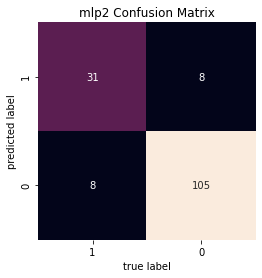

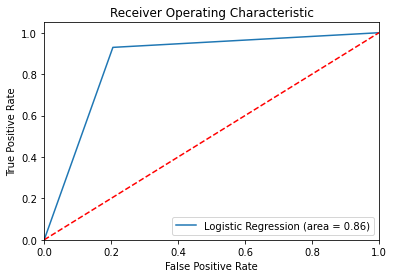

In [164]:
y_pred_mlp2 = grid_mlp2.predict(X_test)

print(classification_report(y_test, y_pred_mlp2))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_mlp2)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('mlp2 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_mlp2)

### ROC_AUC Metric 

In [168]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('mlp', MLPClassifier())]
mlp_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.85,0.9],'pca__whiten':[False,True],'mlp__hidden_layer_sizes':[100,200],
                'mlp__learning_rate':['constant','invscaling']}
grid_mlp3 = GridSearchCV(mlp_pipeline, param_grid=parameteres,scoring ='roc_auc',verbose= 3, cv=5,return_train_score = True)
grid_mlp3.fit(X_sm, y_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=False; total time=   1.5s
[CV 2/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=False; total time=   1.8s
[CV 3/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=False; total time=   1.2s
[CV 4/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=False; total time=   1.2s
[CV 5/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=False; total time=   1.4s
[CV 1/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=True; total time=   1.3s
[CV 2/5] END mlp__hidden_layer_sizes=100, mlp__learning_rate=constant, pca__n_components=0.85, pca__whiten=True; total time=   1.5s
[CV 3/5] E

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('mlp', MLPClassifier())]),
             param_grid={'mlp__hidden_layer_sizes': [100, 200],
                         'mlp__learning_rate': ['constant', 'invscaling'],
                         'pca__n_components': [0.85, 0.9],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [169]:
print ('best parameters of the model are:',grid_mlp3.best_params_)
print ('Mean roc_auc of the model with 5-fold is:',grid_mlp3.best_score_)

best parameters of the model are: {'mlp__hidden_layer_sizes': 200, 'mlp__learning_rate': 'constant', 'pca__n_components': 0.9, 'pca__whiten': False}
Mean roc_auc of the model with 5-fold is: 0.9896923076923076


              precision    recall  f1-score   support

           0       0.82      0.79      0.81        39
           1       0.93      0.94      0.93       113

    accuracy                           0.90       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.90      0.90      0.90       152



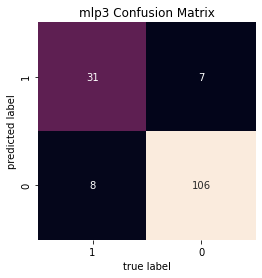

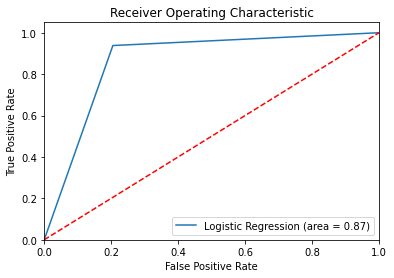

In [170]:
y_pred_mlp3 = grid_mlp3.predict(X_test)

print(classification_report(y_test, y_pred_mlp3))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_mlp3)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('mlp3 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_mlp3)

## Ensemble Classifiers 

### Accuracy Metric

In [100]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('b', BaggingClassifier(random_state = 2045))]
b_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.8,0.85,0.9],'pca__whiten':[False,True],
               'b__n_estimators':[10,20,100], 'b__max_features' : [0.5,0.6,0.75]}
grid_b = GridSearchCV(b_pipeline, param_grid=parameteres,scoring ='accuracy',verbose= 3, cv=5,return_train_score = True)
grid_b.fit(X_sm, y_sm)

ax_features=0.6, b__n_estimators=10, pca__n_components=0.8, pca__whiten=True; total time=   0.4s
[CV 4/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.8, pca__whiten=True; total time=   0.3s
[CV 5/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.8, pca__whiten=True; total time=   0.3s
[CV 1/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.4s
[CV 2/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.3s
[CV 3/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.5s
[CV 4/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.4s
[CV 5/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.4s
[CV 1/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=True;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('b',
                                        BaggingClassifier(random_state=2045))]),
             param_grid={'b__max_features': [0.5, 0.6, 0.75],
                         'b__n_estimators': [10, 20, 100],
                         'pca__n_components': [0.8, 0.85, 0.9],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [101]:
print ('best parameters of the model are:',grid_b.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_b.best_score_)

best parameters of the model are: {'b__max_features': 0.5, 'b__n_estimators': 100, 'pca__n_components': 0.8, 'pca__whiten': False}
Mean accuracy of the model with 5-fold is: 0.9301780233271947


              precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.93      0.95      0.94       113

    accuracy                           0.91       152
   macro avg       0.88      0.87      0.88       152
weighted avg       0.91      0.91      0.91       152



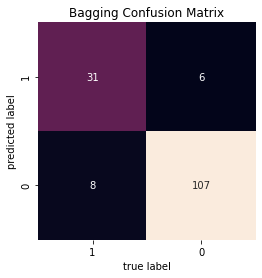

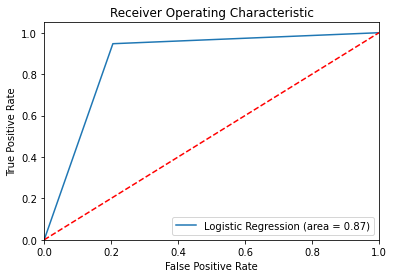

In [102]:
y_pred_b = grid_b.predict(X_test)

print(classification_report(y_test, y_pred_b))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_b)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Bagging Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_b)

### F1_Metric 

In [103]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('b', BaggingClassifier(random_state = 2045))]
b_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.8,0.85,0.9],'pca__whiten':[False,True],
               'b__n_estimators':[10,20,100], 'b__max_features' : [0.5,0.6,0.75]}
grid_b1 = GridSearchCV(b_pipeline, param_grid=parameteres,scoring ='f1',verbose= 3, cv=5,return_train_score = True)
grid_b1.fit(X_sm, y_sm)

ax_features=0.6, b__n_estimators=10, pca__n_components=0.8, pca__whiten=True; total time=   0.3s
[CV 4/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.8, pca__whiten=True; total time=   0.3s
[CV 5/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.8, pca__whiten=True; total time=   0.3s
[CV 1/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.6s
[CV 2/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.6s
[CV 3/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.5s
[CV 4/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.5s
[CV 5/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.7s
[CV 1/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=True;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('b',
                                        BaggingClassifier(random_state=2045))]),
             param_grid={'b__max_features': [0.5, 0.6, 0.75],
                         'b__n_estimators': [10, 20, 100],
                         'pca__n_components': [0.8, 0.85, 0.9],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='f1', verbose=3)

In [104]:
print ('best parameters of the model are:',grid_b1.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_b1.best_score_)

best parameters of the model are: {'b__max_features': 0.5, 'b__n_estimators': 100, 'pca__n_components': 0.8, 'pca__whiten': False}
Mean accuracy of the model with 5-fold is: 0.9281683525619755


              precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.93      0.95      0.94       113

    accuracy                           0.91       152
   macro avg       0.88      0.87      0.88       152
weighted avg       0.91      0.91      0.91       152



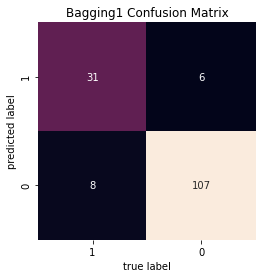

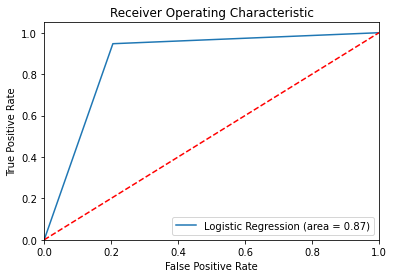

In [105]:
y_pred_b1 = grid_b1.predict(X_test)

print(classification_report(y_test, y_pred_b1))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_b1)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Bagging1 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_b1)

### ROC_AUC Metric 

In [106]:
steps = [('scaler', StandardScaler()),('pca',PCA()),
         ('b', BaggingClassifier(random_state = 2045))]
b_pipeline = Pipeline(steps)
parameteres = {'pca__n_components':[0.8,0.85,0.9],'pca__whiten':[False,True],
               'b__n_estimators':[10,20,100], 'b__max_features' : [0.5,0.6,0.75]}
grid_b2 = GridSearchCV(b_pipeline, param_grid=parameteres,scoring ='roc_auc',verbose= 3, cv=5,return_train_score = True)
grid_b2.fit(X_sm, y_sm)

ax_features=0.6, b__n_estimators=10, pca__n_components=0.8, pca__whiten=True; total time=   0.5s
[CV 4/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.8, pca__whiten=True; total time=   0.9s
[CV 5/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.8, pca__whiten=True; total time=   0.7s
[CV 1/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.9s
[CV 2/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.7s
[CV 3/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.7s
[CV 4/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   1.0s
[CV 5/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=False; total time=   0.9s
[CV 1/5] END b__max_features=0.6, b__n_estimators=10, pca__n_components=0.85, pca__whiten=True;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('b',
                                        BaggingClassifier(random_state=2045))]),
             param_grid={'b__max_features': [0.5, 0.6, 0.75],
                         'b__n_estimators': [10, 20, 100],
                         'pca__n_components': [0.8, 0.85, 0.9],
                         'pca__whiten': [False, True]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [107]:
print ('best parameters of the model are:',grid_b2.best_params_)
print ('Mean accuracy of the model with 5-fold is:',grid_b2.best_score_)

best parameters of the model are: {'b__max_features': 0.5, 'b__n_estimators': 100, 'pca__n_components': 0.8, 'pca__whiten': False}
Mean accuracy of the model with 5-fold is: 0.9816802333469001


              precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.93      0.95      0.94       113

    accuracy                           0.91       152
   macro avg       0.88      0.87      0.88       152
weighted avg       0.91      0.91      0.91       152



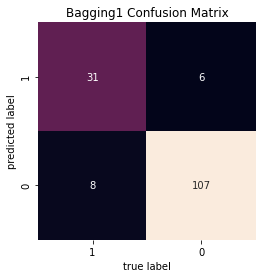

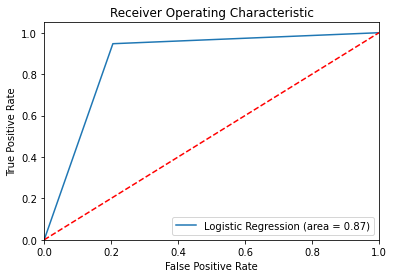

In [108]:
y_pred_b2 = grid_b2.predict(X_test)

print(classification_report(y_test, y_pred_b2))

labels = ['1', '0'] 
cnf_matrix = confusion_matrix(y_test, y_pred_b2)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Bagging2 Confusion Matrix')
plt.show()

plot_ROC(y_test,y_pred_b2)